In [2]:
import pandas as pd
import numpy as np


Importanto bando de datos de de url

In [3]:
url ='https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

In [4]:
df = pd.read_csv(url)
df

,Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Quitinete;Copacabana;1;0;0;40;1700;500;60
1,Casa;Jardim Botânico;2;0;1;100;7000;;
2,Conjunto Comercial/Sala;Barra da Tijuca;0;4;0;...
3,Apartamento;Centro;1;0;0;15;800;390;20
4,Apartamento;Higienópolis;1;0;0;48;800;230;
...,...
32955,Quitinete;Centro;0;0;0;27;800;350;25
32956,Apartamento;Jacarepaguá;3;1;2;78;1800;800;40
32957,Apartamento;São Francisco Xavier;2;1;0;48;1400...
32958,Apartamento;Leblon;2;0;0;70;3000;760;


Al visualizar los datos percibimos que esta separado por ; por tanto vamos corregir la importación

In [5]:
df = pd.read_csv(url, sep=';')
df.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [6]:
type(df)

pandas.core.frame.DataFrame

Para conocer la extrutura de nuestro data frame podemos usar el metodo shape



In [7]:
df.shape

(32960, 9)

Podemos observar que tiene 32960 filas y 9 columnas


Ahora vamos a evaluar las columnas que tenemos disponibles


In [8]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

Ya sabemos los nombres de las columnas que conforman nuestro dataframe, ahora vamos a ver
que tipo de información esta contenida en ellas usando el metodo info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [10]:
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [11]:
df[['Quartos','Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


Vamos a realizar algunos análisis que fueron solicitados sobre los datos.

>Algumas perguntas que podemos fazer nesse momento:
> 1. Quais os valores médios de aluguel por tipo de imóvel?
> 2. Qual o percentual de cada tipo de imóvel na nossa base de dados?




In [12]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Valor medio por tipo de alquiler

In [13]:
#Vamos a calcular la media total, para entender el metodo .mean()
df['Valor'].mean()
#El output representa la media de todos los valores de alquiler.

np.float64(12952.659715265761)

In [15]:
#Vamos a utilizar el metodo groupby que nos permite agrupar los datos baseados en otra columna.
#Importante destacar que el metodo groupby siempre esta acompañado por otro metodo que puede ser de algún cálculo.
df.groupby('Tipo').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [16]:
#El código anterio no funcionó bien porque el metodo mean() se aplica a todas las columnas,
#en nuestro caso también tenemos columnas tipo str. Para resolver eso, dentro del metodo mean
#indicamos que solo será aplicado en las columnas numericas.
df.groupby('Tipo').mean(numeric_only=True).round(2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.48,1.23,0.88,119.79,4744.61,1722.65,686.17
Box/Garagem,0.06,1.30,0.00,17.52,1899.76,305.45,125.85
Casa,3.13,1.80,1.26,250.58,6793.45,931.28,1582.51
Casa Comercial,1.56,2.20,0.26,372.24,14478.26,1935.71,1707.39
Casa de Condomínio,4.01,3.10,2.86,456.16,11952.06,1342.03,3252.52
Casa de Vila,1.93,0.39,0.23,78.47,1574.37,138.77,183.88
Chácara,3.00,0.00,0.00,0.00,4900.00,NaN,NaN
Conjunto Comercial/Sala,0.04,2.52,0.01,214.47,14715.05,4512.22,1399.60
Flat,1.42,0.96,0.75,65.48,4546.19,2027.72,493.17


In [17]:
#Como podemos notar nuestro foco es el valor, y ahora tenemos la media de todas las columnas del dataframe.
#Para resolver eso, despues del groupby colocamos el nombre de la columna de interés.
#Como solo tendremos una columna de tipo numérico, ya no es necesario indicar que la media se aplique solo en valores numericos.
#En el caso anterior era necesario porque se estaba aplicando a todas las columnas y tenemos columnas
#que no son numeriocas

In [18]:
#Ahora solo evaluaremos al columnas de tipo y valor.
df.groupby('Tipo')['Valor'].mean().round(2)

Tipo
Apartamento                      4744.61
Box/Garagem                      1899.76
Casa                             6793.45
Casa Comercial                  14478.26
Casa de Condomínio              11952.06
Casa de Vila                     1574.37
Chácara                          4900.00
Conjunto Comercial/Sala         14715.05
Flat                             4546.19
Galpão/Depósito/Armazém         53407.06
Hotel                           25000.00
Indústria                      120000.00
Loft                             2557.88
Loja Shopping/ Ct Comercial      8126.18
Loja/Salão                      13769.65
Loteamento/Condomínio           22000.00
Pousada/Chalé                    1480.00
Prédio Inteiro                 498637.24
Quitinete                        1246.84
Studio                           2400.00
Sítio                           12499.00
Terreno Padrão                  32567.71
Name: Valor, dtype: float64

Ya tenemos los valores de las medias por tipo. Ahora podemos convertir ese resultado en un data frame para mejorar la visualización, además también podemos ordenar la información. 
Para ello, valor es encerrado en corchetes dobles, y se agregaq el metodo sort_values('Indicando cual será la columna usada para ordenar')

In [19]:
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor').round(2)

,Valor
Tipo,
Quitinete,1246.84
Pousada/Chalé,1480.00
Casa de Vila,1574.37
Box/Garagem,1899.76
Studio,2400.00
Loft,2557.88
Flat,4546.19
Apartamento,4744.61
Chácara,4900.00


Ahora que ya tenemos organizada la información, podriamos crear un grafico para visualizar la distribución media por tipo. 
para eso crearemos una variable que contenga los valores del dataframe con el nombre media_por_tipo

In [20]:
media_por_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

Luego podemos crear el grafico usando la biblioteca matplotlib

<Axes: ylabel='Tipo'>

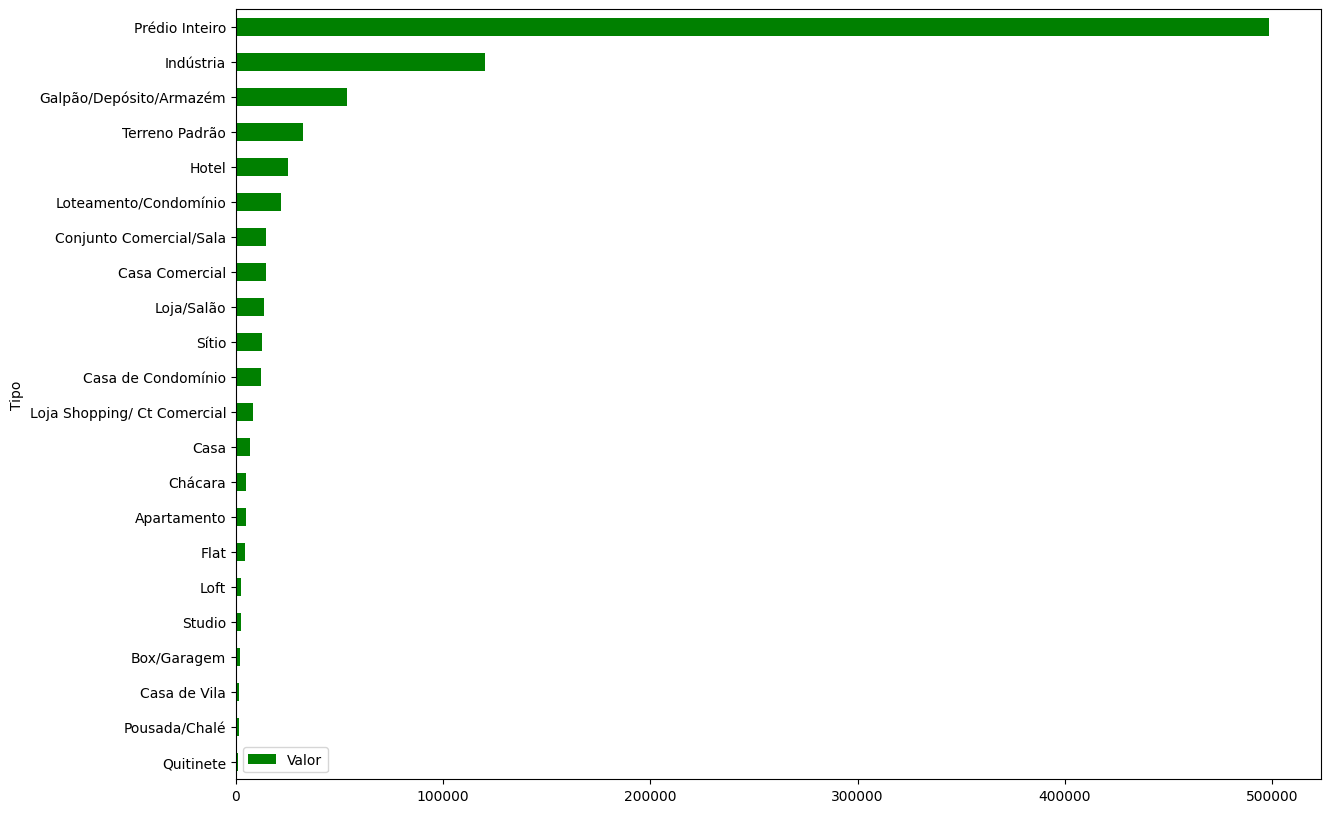

In [21]:
media_por_tipo.plot(kind='barh', figsize=[14,10], color="green")

Visualmente podemos notar las diferencias entre los distintos tipo de alquiler. Ahora debemos pensar en quién usará la información, y que aspectos son relevantes, por tanto, sabiendo que el equipo de machine learning no tiene interés en los inmuebles de tipo comercial, podemos quitar de nuestro dataframe esas informaciónes para no influenciar en el aprendizaje del modelo

### Removiendo inmuebles comerciales

Para comenzar vamos a listar tipos de inmuebles

In [22]:
# En la actividad sugerida el instructor acceso a la columna tipo usando unique usando punto.
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [23]:
#Por curiosidad quise intentar la siguiente forma
df['Tipo'].unique()
#Y conseguí el mismo resultado.

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [24]:
#A titulo práctico vamos a crear una lista con tipos de alquiler comercial
inmuebles_comerciales = ['Conjunto Comercial/Sala','Loteamento/Condomínio','Prédio Inteiro','Loja/Salão','Galpão/Depósito/Armazém','Casa Comercial','Terreno Padrão','Box/Garagem','Loja Shopping/ Ct Comercial','Chácara','Sítio','Pousada/Chalé', 'Hotel', 'Indústria']

A continuación vamos usar el metodo query de la biblioteca pandas para hacer consultas.

In [25]:
#Para usar el metodo de consulta podemos pasar una variable usando @ para indicar la variable
df.query('@inmuebles_comerciales in Tipo').head(3)
#En éste caso la consulta será basada en la lista de inmuebles comerciales.
#Auque no es nuestro proposito principal, sirve como ejemplo para ver como podemos
#Ubicar los datos opuestos a los que ya tenemos.



,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0


ahora, para consuta los inmueble residenciales lo que podemos hacer en modificar la consulta para que nos retorne los NO comerciales. Que son nuestro interes.

In [26]:
residenciales = df.query('@inmuebles_comerciales not in Tipo')
residenciales.head(4)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


También podemos vericar que solo tenemos valores de los elementos de tipo comercial. Usando el metodo unique, nuevamente

In [27]:
residenciales['Tipo'].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

Vamos agrupar nuevamente para crear un gráfico.

In [28]:
df_bar=residenciales.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

<Axes: ylabel='Tipo'>

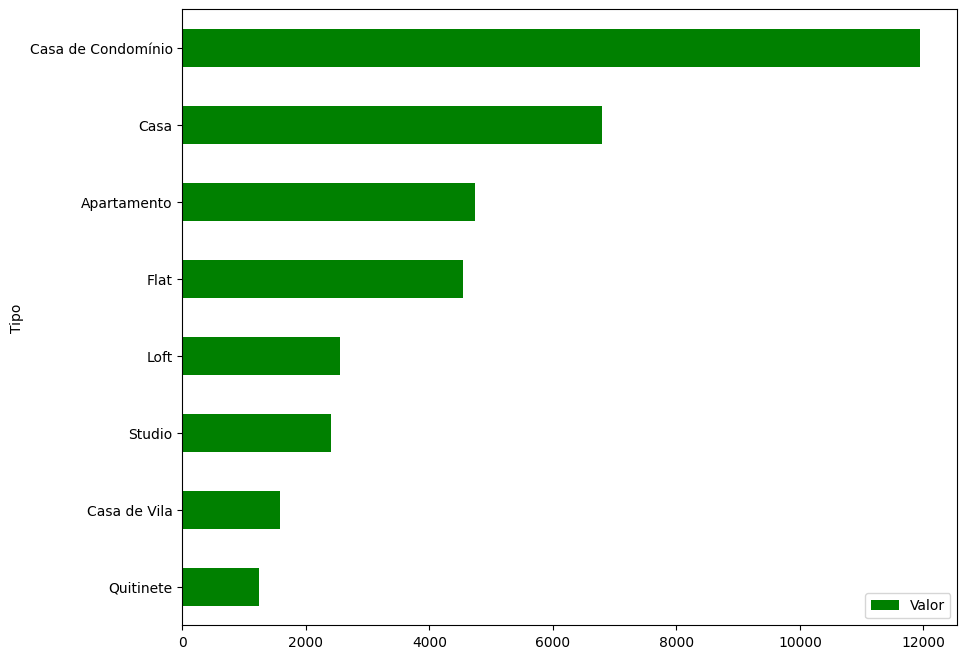

In [29]:
df_bar.plot(kind='barh',figsize=(10,8), color="green")

### Determinar el valor porcentual de cada tipo de alquiler presente en nuestra base de datos

Para ello vamos a comenzar con verificar las columnas presentes en nuestra base de datos. Usando unique

In [30]:
residenciales.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [33]:
#Para evaluar la cantidad de veces que aparece en una columna, se usa el método value_counts()
residenciales.Tipo.value_counts()

Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

Ahora podemos ver la cantidad de apariciones de cada tipo en nuestra base de datos. Pero nuestro foco de analisis es conseguir el percetual de cada tipo. Para ello se aplica el parámetro normalize=True dentro del la funcions value_counts

In [34]:
residenciales.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

Podemos ver que ya tenemos el percentual de la cantidad de tipos. Para mejorar la visualización es poseible convertir esto a un dataframe usando el metodo to_frame()

In [35]:
residenciales.Tipo.value_counts(normalize=True).to_frame()

,proportion
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


Para mejorar la presentación, podríamos ordenar de menor a mayor las proporciones

In [45]:
residenciales.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')


,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


Siguiendo, vamso a guardar ese dataframe en una variable para crear un grafico que permita visualizar la información mas claramente.


In [48]:
df_tipos_percentual = residenciales.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')
df_tipos_percentual

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: xlabel='Porcentual', ylabel='Tipos'>

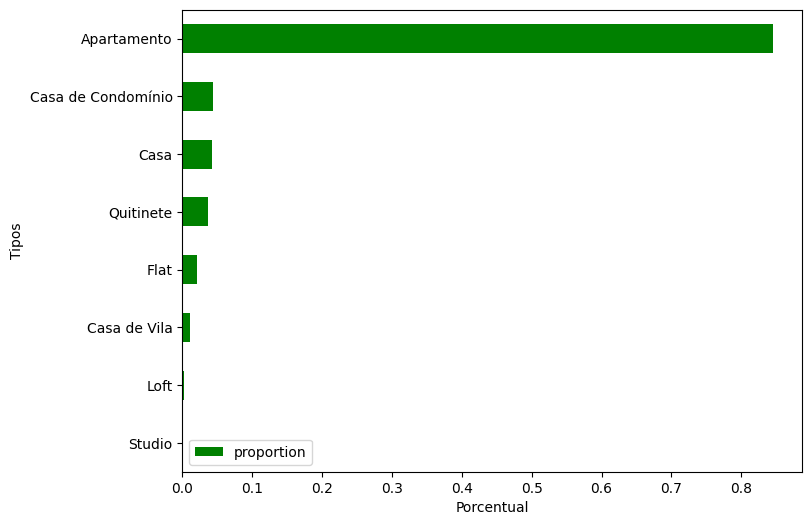

In [51]:
df_tipos_percentual.plot(kind="barh", figsize=(8,6), color='green', ylabel='Tipos', xlabel='Porcentual')

Observando el gráfico podemos percibir que el tipo apartamento representa más del 80% de los datos. Tomando en cuenta que la variación de los precios respecto a los otros tipos de inmuebles es notoria y la mayoria de inmuebles que estan en la base datos son de tipo apartemento. Es considerable solo dejar apartamentos, y nos usar los otros tipos de inmuebles en este analisis.

In [72]:
tipo_apartamento = residenciales.query('"Apartamento" in Tipo')
print(tipo_apartamento.Tipo.unique())
tipo_apartamento

['Apartamento']


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Con ese dataframe concluimos la seguda tarea de las demandas de ML